In [118]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Users\\HP\\Downloads\\Life_expectancy_dataset.csv",encoding="ISO-8859-1")

In [119]:
df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [121]:
X = []
for _ in df["Continent"]:
    if _ == "Asia":
        X.append(_)
        pass
    else:
        X.append("Non Asia")
    pass

In [122]:
df["Continent"] = X
df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Non Asia
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Non Asia
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Non Asia
219,220,Swaziland,51.6,52.2,51.0,Non Asia
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Non Asia


In [123]:
df.drop("Overall Life",axis=1,inplace=True)

In [124]:
df.drop("Rank",axis=1,inplace=True)
df.drop("Country",axis=1,inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Male Life    223 non-null    float64
 1   Female Life  223 non-null    float64
 2   Continent    223 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.4+ KB


In [132]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [141]:
y = df["Continent"]
X = df.drop("Continent",axis=1)

svm = LinearSVC(C = 10000, loss="hinge")



svm.fit(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10000, loss='hinge')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


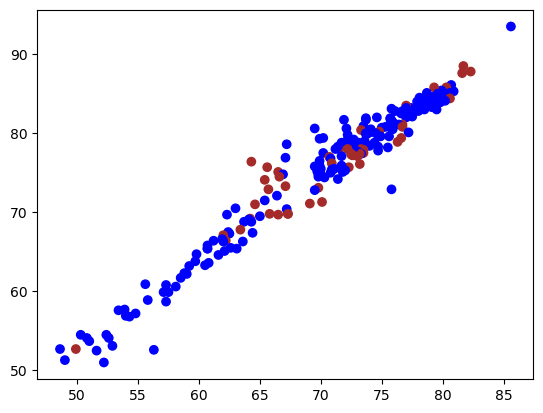

In [142]:
svm_clf.predict([X.iloc[54]])
import matplotlib.pyplot as plt
plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y, cmap='winter')

In [143]:
y.replace("Asia","brown",inplace=True)
y.replace("Non Asia","blue",inplace=True)

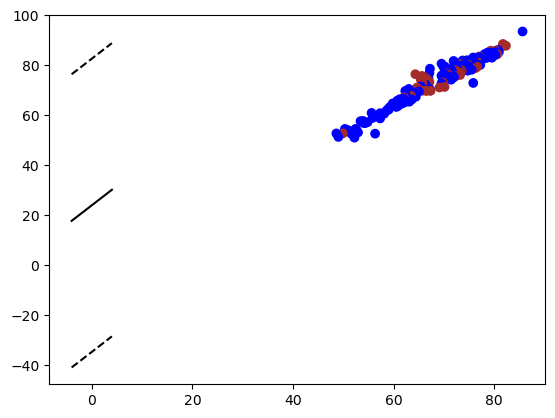

In [144]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y, cmap='winter')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.coef_[0], svm.intercept_)
b0 = 4; b1 = f(b0, svm.coef_[0], svm.intercept_)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.coef_[0], svm.intercept_, 1)
b0 = 4; b1 = f(b0, svm.coef_[0], svm.intercept_, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.coef_[0], svm.intercept_, -1)
b0 = 4; b1 = f(b0, svm.coef_[0], svm.intercept_, -1)
plt.plot([a0,b0], [a1,b1], 'k--')